## Time Series Analysis

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Read CSV files

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Missing values in dataframe

In [4]:
df.columns = ['Month','nPass']

In [5]:
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.isna().sum()

Month    0
nPass    0
dtype: int64

#### If any missing values present apply interpolation

In [7]:
df['nPass'] = df['nPass'].interpolate()

In [8]:
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Convert month to datetime

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,nPass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
df.dtypes

Month    datetime64[ns]
nPass             int64
dtype: object

#### Keep row index as month

In [13]:
df.index = df['Month']

In [14]:
df.head()

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [15]:
df = df.drop(columns=['Month'])

In [16]:
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualize time series data

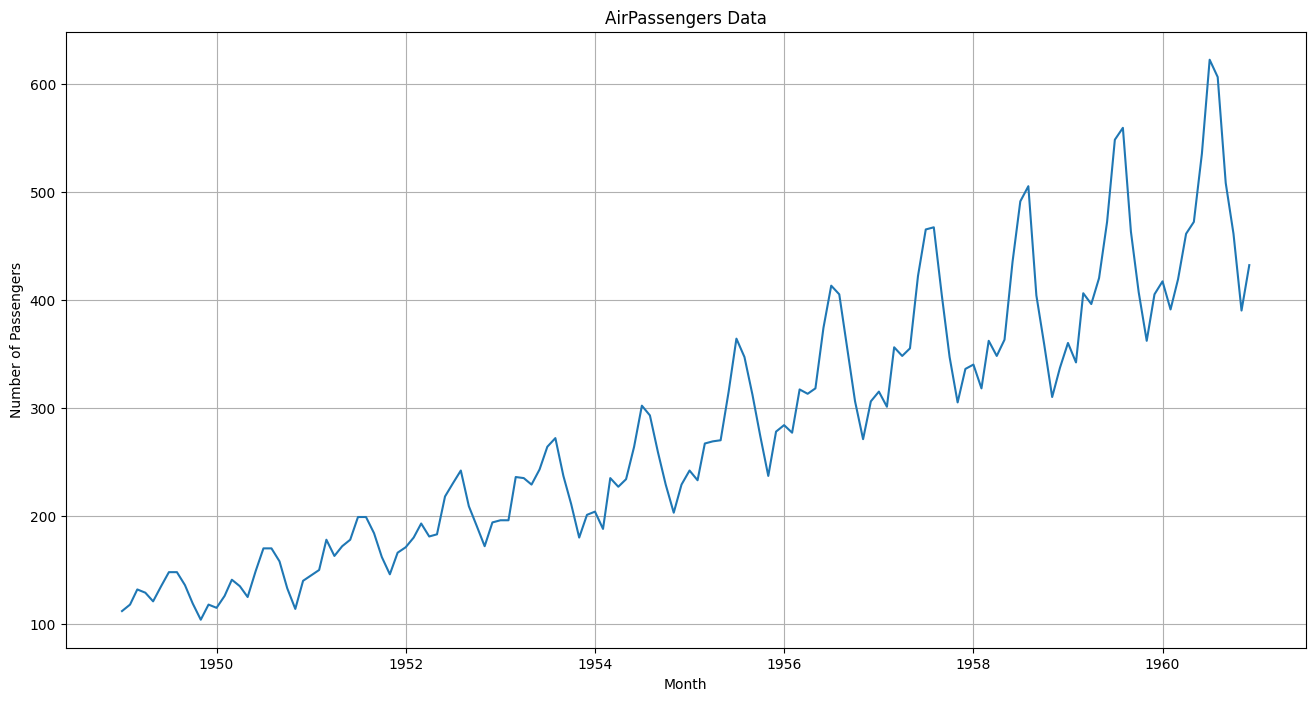

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('AirPassengers Data')
plt.grid()
plt.show()

#### Perform time series decomposition

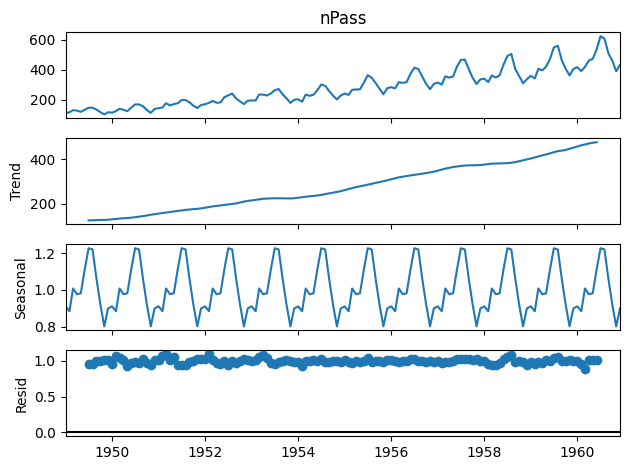

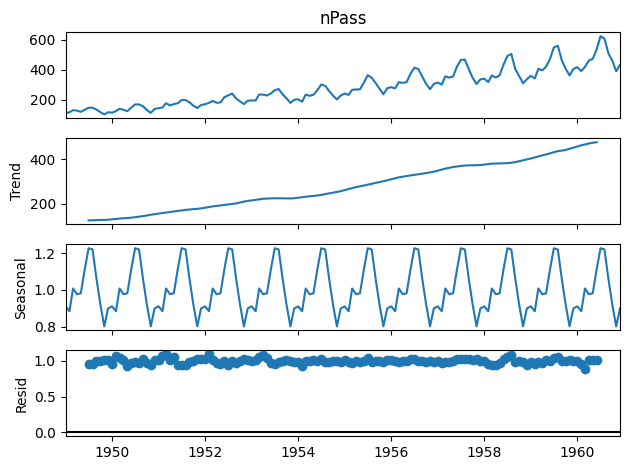

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['nPass'], model='multiplicative')
Q.plot()

#### Trend graph with observed details

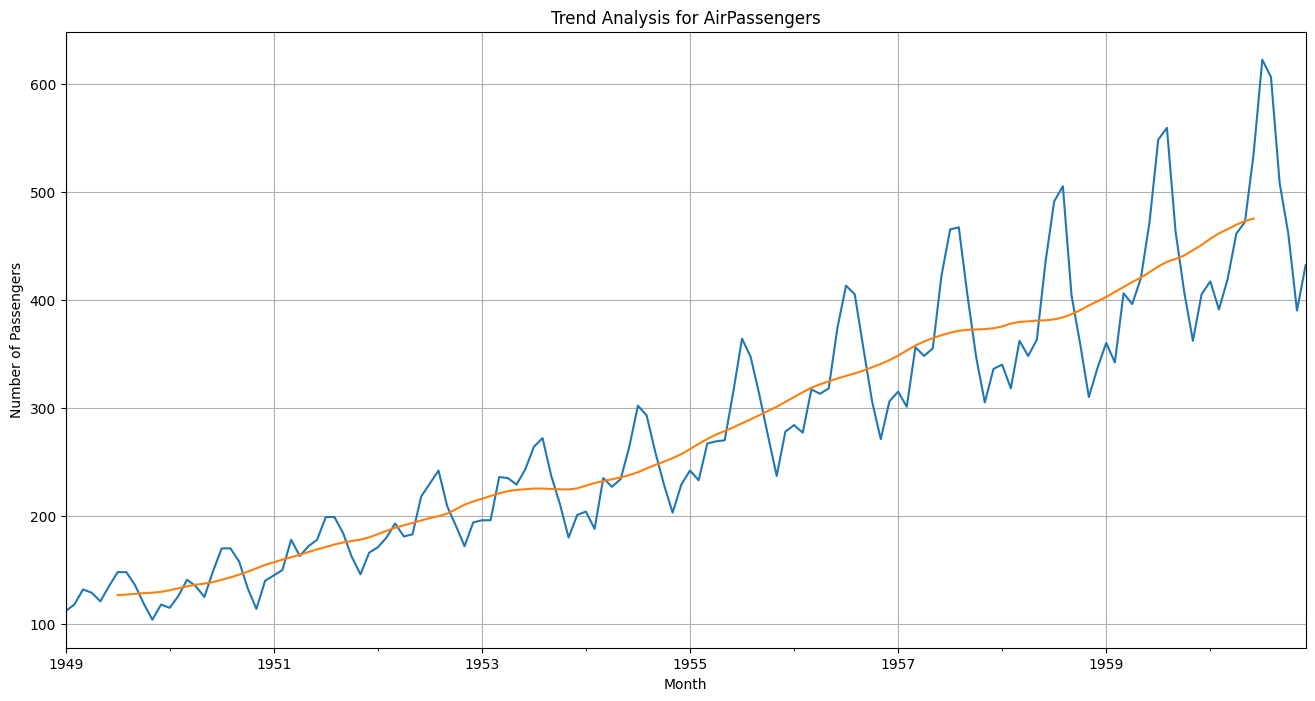

In [24]:
plt.figure(figsize=(16, 8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Trend Analysis for AirPassengers')
plt.grid()
plt.show()

#### Seasonlity plot

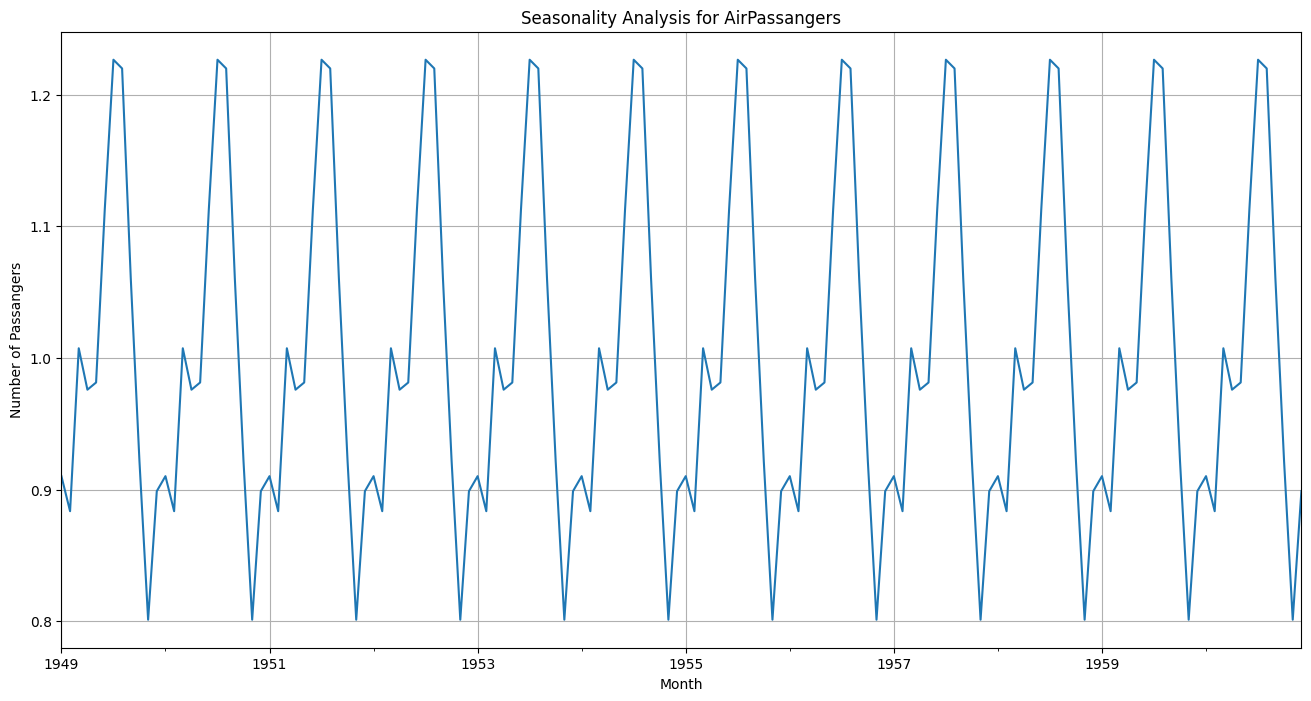

In [25]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passangers')
plt.title('Seasonality Analysis for AirPassangers')
plt.grid()
plt.show()

#### Residual Plot

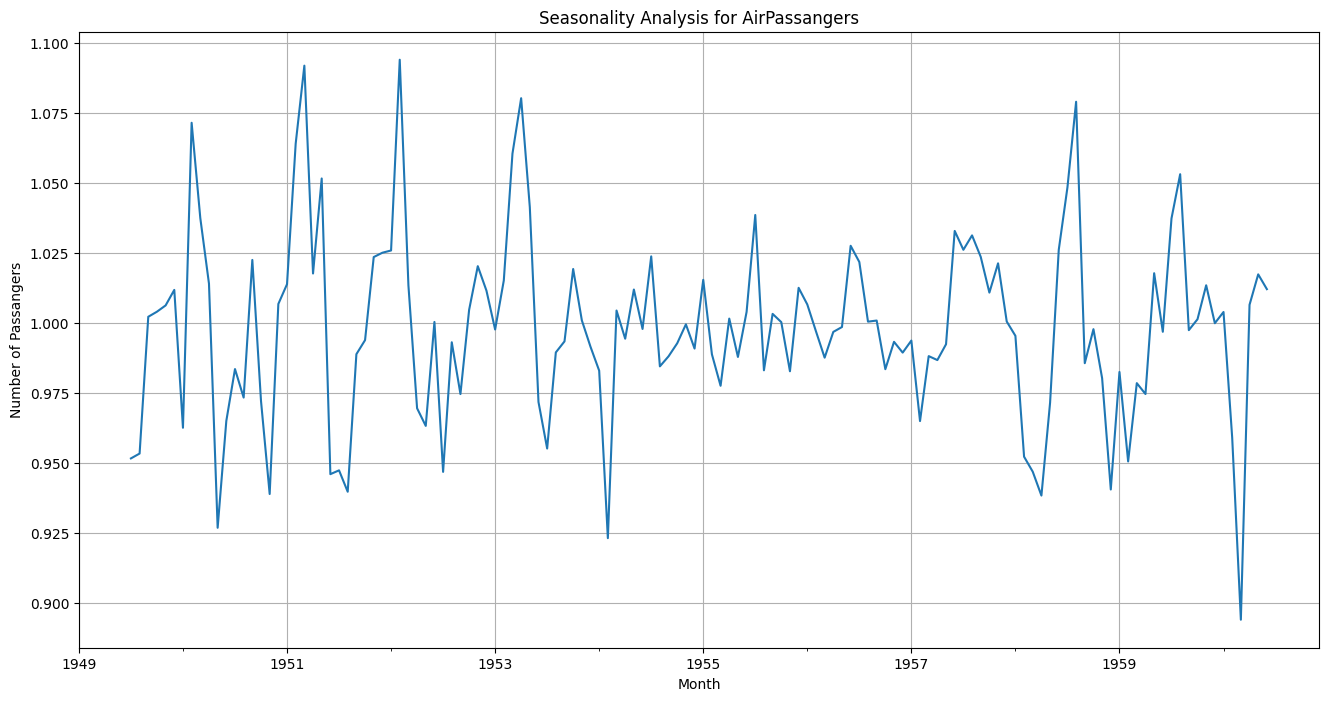

In [26]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.xlabel('Month')
plt.ylabel('Number of Passangers')
plt.title('Seasonality Analysis for AirPassangers')
plt.grid()
plt.show()

#### Time Series Forecasting

#### Install pmdarima package

In [27]:
%pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/61/d3/68990f655b015afa9c10e8e0b88e6efc900d8f6f852322d33d20601e22d2/Cython-3.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 409.6 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/614.7 kB 459.5 kB/s eta 0:00:02
   ------ -------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Restart and run all cells

In [28]:
from pmdarima.arima import auto_arima

In [29]:
model = auto_arima(df['nPass'],m=12)

In [30]:
model.order

(2, 1, 1)

In [31]:
p = model.order[0]
d = model.order[1]
q = model.order[2]

In [32]:
p

2

In [33]:
d

1

In [34]:
q

1

### Forecast data for next 3 years

3 years = 36 months

In [35]:
forecast, conf_int = model.predict(n_periods=36, return_conf_int=True)

In [36]:
forecast

1961-01-01    445.634992
1961-02-01    420.395105
1961-03-01    449.198453
1961-04-01    491.840097
1961-05-01    503.394636
1961-06-01    566.862614
1961-07-01    654.260339
1961-08-01    638.597647
1961-09-01    540.883896
1961-10-01    494.126769
1961-11-01    423.332850
1961-12-01    465.507710
1962-01-01    479.291071
1962-02-01    454.177076
1962-03-01    483.087244
1962-04-01    525.819525
1962-05-01    537.450970
1962-06-01    600.984203
1962-07-01    688.437297
1962-08-01    672.821587
1962-09-01    575.147699
1962-10-01    528.424396
1962-11-01    457.659177
1962-12-01    499.858389
1963-01-01    513.662413
1963-02-01    488.565951
1963-03-01    517.490995
1963-04-01    560.235899
1963-05-01    571.878055
1963-06-01    635.420375
1963-07-01    722.881180
1963-08-01    707.272013
1963-09-01    609.603676
1963-10-01    562.885084
1963-11-01    492.123862
1963-12-01    534.326466
Freq: MS, dtype: float64

In [37]:
forecast = forecast.apply(round)
forecast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [38]:
conf_int

array([[423.34489452, 467.92508914],
       [394.23553286, 446.55467616],
       [419.8319086 , 478.56499685],
       [460.37651071, 523.30368317],
       [470.38074798, 536.40852429],
       [532.69965017, 601.02557729],
       [619.22148904, 689.29918852],
       [602.88021444, 674.31508021],
       [504.631608  , 577.13618405],
       [457.4462536 , 530.80728394],
       [386.30415484, 460.36154489],
       [428.19162446, 502.82379516],
       [433.49783917, 525.08430312],
       [405.10925177, 503.2449    ],
       [431.15604952, 535.01843851],
       [471.84099724, 579.79805341],
       [481.87405382, 593.02788711],
       [544.15708549, 657.81132058],
       [630.60927168, 746.26532271],
       [614.17968221, 731.46349108],
       [515.83291243, 634.46248521],
       [468.54460838, 588.30418339],
       [397.29775847, 518.02059561],
       [439.08041825, 560.63635994],
       [446.32773032, 580.99709628],
       [418.31885971, 558.8130414 ],
       [444.62493608, 590.35705411],
 

#### Get lower and upper confidence bound

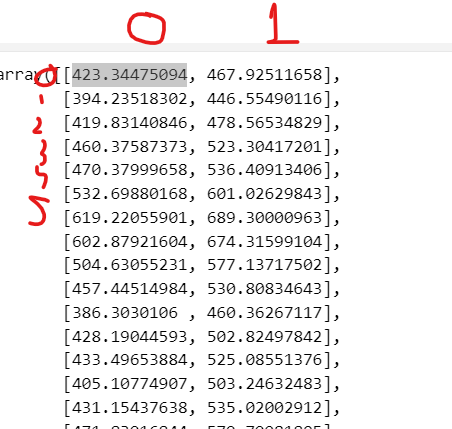

In [39]:
lower = conf_int[:,0]
upper = conf_int[:,1]

In [40]:
lower

array([423.34489452, 394.23553286, 419.8319086 , 460.37651071,
       470.38074798, 532.69965017, 619.22148904, 602.88021444,
       504.631608  , 457.4462536 , 386.30415484, 428.19162446,
       433.49783917, 405.10925177, 431.15604952, 471.84099724,
       481.87405382, 544.15708549, 630.60927168, 614.17968221,
       515.83291243, 468.54460838, 397.29775847, 439.08041825,
       446.32773032, 418.31885971, 444.62493608, 485.40258381,
       495.45124398, 557.69974783, 644.08748414, 627.57498822,
       529.13419697, 481.74538322, 410.39449536, 452.07147303])

In [41]:
upper

array([467.92508914, 446.55467616, 478.56499685, 523.30368317,
       536.40852429, 601.02557729, 689.29918852, 674.31508021,
       577.13618405, 530.80728394, 460.36154489, 502.82379516,
       525.08430312, 503.2449    , 535.01843851, 579.79805341,
       593.02788711, 657.81132058, 746.26532271, 731.46349108,
       634.46248521, 588.30418339, 518.02059561, 560.63635994,
       580.99709628, 558.8130414 , 590.35705411, 635.0692144 ,
       648.3048653 , 713.14100224, 801.67487635, 786.96903687,
       690.07315574, 644.0247848 , 573.85322887, 616.58145818])

In [42]:
lower = pd.Series(lower)
lower.index = forecast.index
lower = lower.apply(round)
lower

1961-01-01    423
1961-02-01    394
1961-03-01    420
1961-04-01    460
1961-05-01    470
1961-06-01    533
1961-07-01    619
1961-08-01    603
1961-09-01    505
1961-10-01    457
1961-11-01    386
1961-12-01    428
1962-01-01    433
1962-02-01    405
1962-03-01    431
1962-04-01    472
1962-05-01    482
1962-06-01    544
1962-07-01    631
1962-08-01    614
1962-09-01    516
1962-10-01    469
1962-11-01    397
1962-12-01    439
1963-01-01    446
1963-02-01    418
1963-03-01    445
1963-04-01    485
1963-05-01    495
1963-06-01    558
1963-07-01    644
1963-08-01    628
1963-09-01    529
1963-10-01    482
1963-11-01    410
1963-12-01    452
Freq: MS, dtype: int64

In [44]:
upper = pd.Series(upper)
upper.index = forecast.index
upper = upper.apply(round)
upper

1961-01-01    468
1961-02-01    447
1961-03-01    479
1961-04-01    523
1961-05-01    536
1961-06-01    601
1961-07-01    689
1961-08-01    674
1961-09-01    577
1961-10-01    531
1961-11-01    460
1961-12-01    503
1962-01-01    525
1962-02-01    503
1962-03-01    535
1962-04-01    580
1962-05-01    593
1962-06-01    658
1962-07-01    746
1962-08-01    731
1962-09-01    634
1962-10-01    588
1962-11-01    518
1962-12-01    561
1963-01-01    581
1963-02-01    559
1963-03-01    590
1963-04-01    635
1963-05-01    648
1963-06-01    713
1963-07-01    802
1963-08-01    787
1963-09-01    690
1963-10-01    644
1963-11-01    574
1963-12-01    617
Freq: MS, dtype: int64

#### Plotting forecast sheet

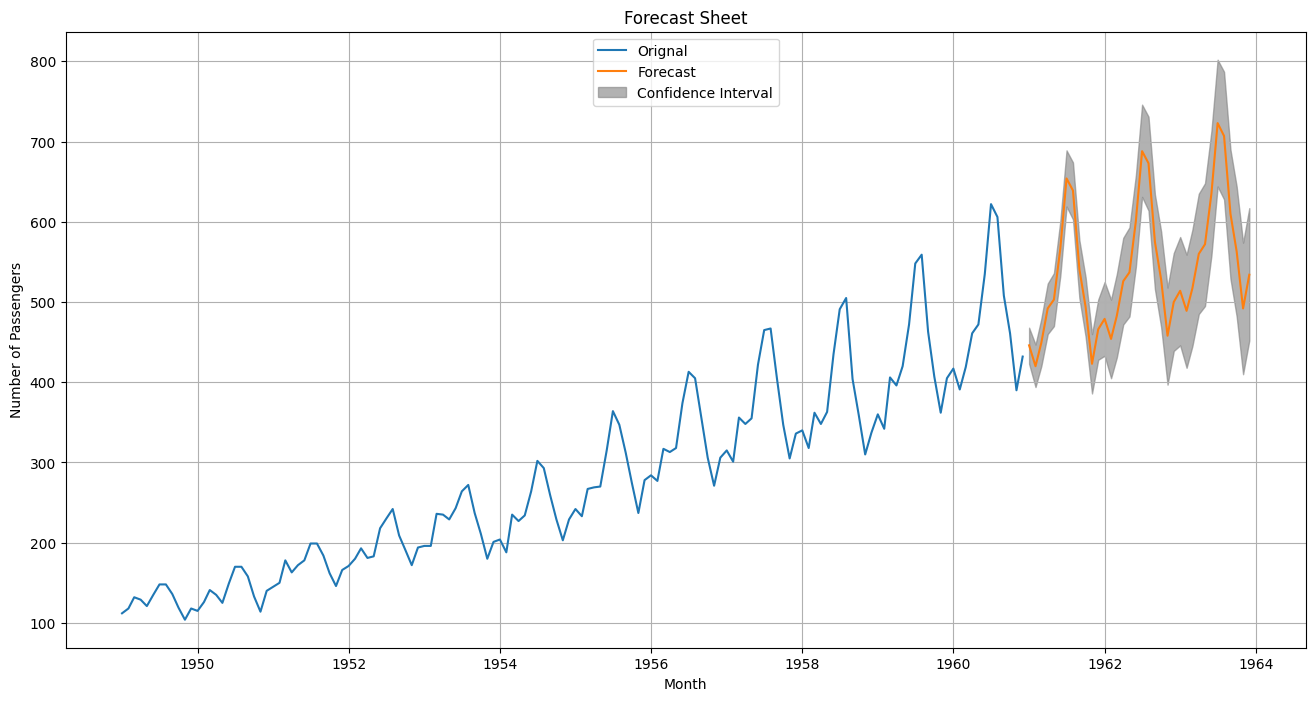

In [45]:
plt.figure(figsize=(16,8))
plt.plot(df['nPass'], label='Orignal')
plt.plot(forecast, label='Forecast')
plt.fill_between(forecast.index, lower, upper, color='gray', alpha=0.6, label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Forecast Sheet')
plt.grid()
plt.legend(loc='upper center')
plt.show()


#### Save above in forecast dataframe

In [46]:
df_forecast = forecast.to_frame()
df_forecast.columns = ['Forecast']
df_forecast

,Forecast
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [47]:
df_forecast['Lower'] = lower
df_forecast['upper'] = upper

In [48]:
df_forecast

,Forecast,Lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


#### Save above to CSV

In [49]:
df_forecast.to_csv('Forecast.csv')